# Code for data selection and visualization

In [1]:
import torch 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.widgets import Slider

%matplotlib widget

Load synthetic data

In [2]:
from lib.load_blender import load_blender_data

datadir = './data/nerf_synthetic/lego'
images, poses, render_poses, hwf, i_split = load_blender_data(datadir, half_res=True)
if images.shape[-1] == 4:
    images = images[...,:3]*images[...,-1:] + (1.-images[...,-1:])

print('Loaded blender, images shape', images.shape)
_, _, i_test = i_split

i_train = list(np.arange(200,250,5)) + list(np.arange(300,350,5)) # 10

images_train = images[i_train]
poses_train = poses[i_train]
camera_train = poses_train[:,:3,-1]

images_test = images[i_test]
poses_test = poses[i_test]
camera_test = poses_test[:,:3,-1]


Loaded blender, images shape (400, 400, 400, 3)


Visualize all images animation

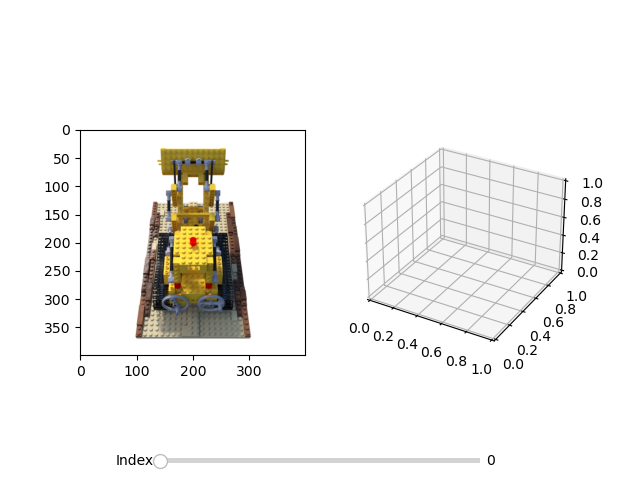

In [3]:
%matplotlib widget

# show animation
plt.clf()
fig = plt.figure(1)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

img = ax1.imshow(images_train[0])

# Creating a new Axes
axamp = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
samp = Slider(axamp, 'Index', 0, 19, valinit=0, valstep=1)

# Animation controls
is_manual = False # True if user has taken control of the animation

def animate(i):
    global is_manual
    if not is_manual:
        ax1.clear()
        img = ax1.imshow(images_train[i])
        ax1.text(20, 30, 'index:'+str(i))
        ax1.axis('off')
        ax2.clear()
        sca0 = ax2.scatter(camera_train[i,0], camera_train[i,1], camera_train[i,2], marker='o', alpha=1., c='r')
        sca1 = ax2.scatter(camera_test[:,0], camera_test[:,1], camera_test[:,2], marker='o', alpha=.3)
        ax2.set_xlim(camera_test[:,0].min(),camera_test[:,0].max())
        ax2.set_ylim(camera_test[:,1].min(),camera_test[:,1].max())
        ax2.set_zlim(camera_test[:,2].min(),camera_test[:,2].max())
        ax2.set_title('Camera')
    else:
        val = int(samp.val)
        ax1.clear()
        img = ax1.imshow(images_train[val])
        ax1.text(20, 30, 'index:'+str(val))
        ax1.axis('off')
        ax2.clear()
        sca0 = ax2.scatter(camera_train[val,0], camera_train[val,1], camera_train[val,2], marker='o', alpha=1., c='r')
        sca1 = ax2.scatter(camera_test[:,0], camera_test[:,1], camera_test[:,2], marker='o', alpha=.3)
        ax2.set_xlim(camera_test[:,0].min(),camera_test[:,0].max())
        ax2.set_ylim(camera_test[:,1].min(),camera_test[:,1].max())
        ax2.set_zlim(camera_test[:,2].min(),camera_test[:,2].max())
        ax2.set_title('Camera')
    return img, sca0, sca1

def update_slider(val):
    val = int(val)
    global is_manual
    is_manual=True
    update(val)

def update(val):
    # update curve
    ax1.imshow(images_train[val])
    ax1.text(20, 30, 'index:'+str(val))
    ax1.axis('off')
    # redraw canvas while idle
    fig.canvas.draw_idle()

def update_plot(num):
    global is_manual
    if is_manual:
        img = ax1.imshow(images_train[val])
        return img # don't change

    val = int(samp.val)
    samp.set_val(val)
    is_manual = False # the above line called update_slider, so we need to reset this
    ax1.clear()
    img = ax1.imshow(images_train[val])
    return img

def on_click(event):
    # Check where the click happened
    (xm,ym),(xM,yM) = samp.label.clipbox.get_points()
    if xm < event.x < xM and ym < event.y < yM:
        # Event happened within the slider, ignore since it is handled in update_slider
        return
    else:
        # user clicked somewhere else on canvas = unpause
        global is_manual
        is_manual=False

# call update function on slider value change
samp.on_changed(update_slider)

fig.canvas.mpl_connect('button_press_event', on_click)

ani = FuncAnimation(fig, animate, interval=300, frames=len(i_train))
# ani.save("lego_vis_train.gif", dpi=300, writer=PillowWriter(fps=3))

plt.show()